<a href="https://colab.research.google.com/github/ForhanShahriarFahim/Artificial-Intelligence-Lab/blob/master/Binary_Image_Classifier(Badam_Chola).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Mount Google Drive
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


### Load Data

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/Classifier Dataset/train",
                                          target_size=(256,256),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/Classifier Dataset/test",
                                          target_size=(256,256),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 848 images belonging to 2 classes.
Found 212 images belonging to 2 classes.


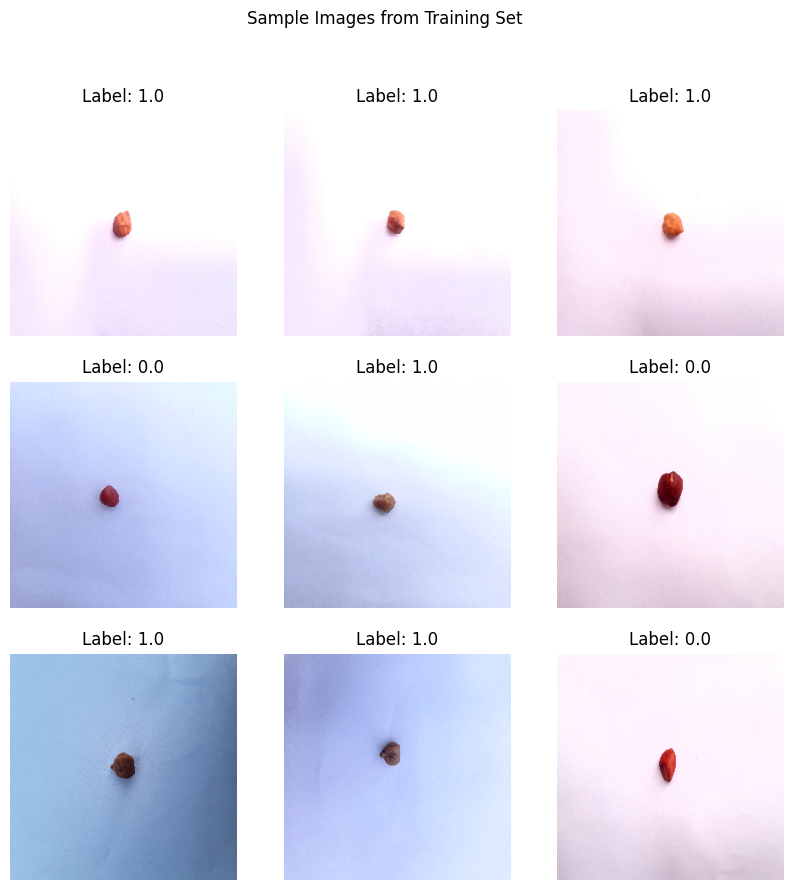

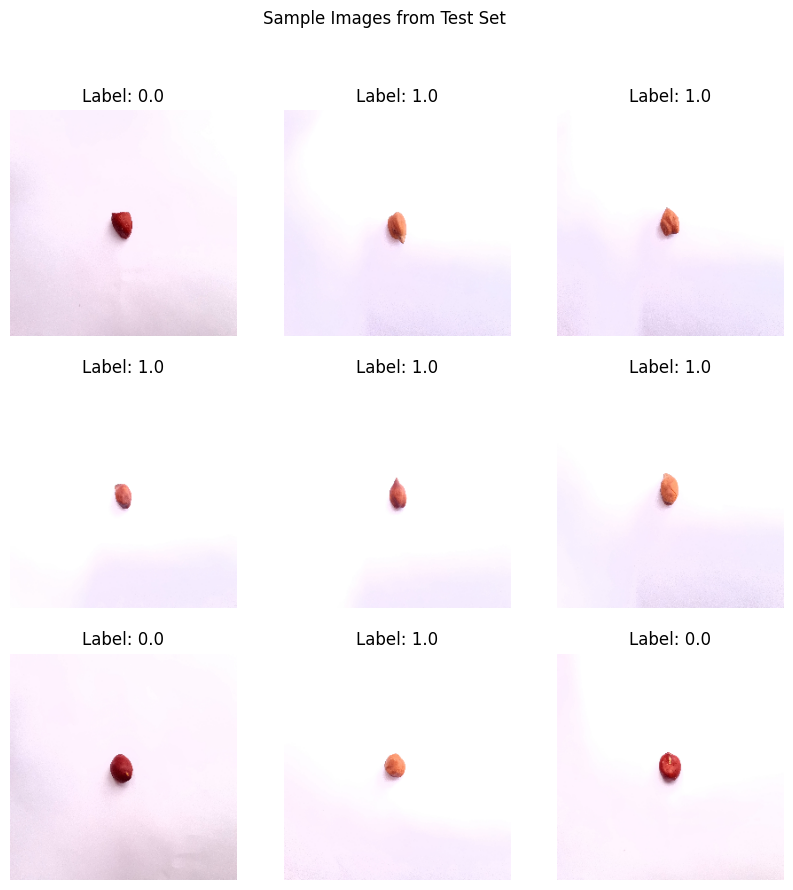

In [4]:
# Get a batch of images and labels from the train dataset
train_images, train_labels = next(train_dataset)

# Get a batch of images and labels from the test dataset
test_images, test_labels = next(test_dataset)

# Display a few images from the train dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.title("Label: {}".format(train_labels[i]))
    plt.axis("off")
plt.suptitle("Sample Images from Training Set")
plt.show()

# Display a few images from the test dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title("Label: {}".format(test_labels[i]))
    plt.axis("off")
plt.suptitle("Sample Images from Test Set")
plt.show()

### Build Deep Learning Model

In [5]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)))
model.add(keras.layers.MaxPool2D(2, 2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPool2D(2, 2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPool2D(2, 2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPool2D(2, 2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function
model.add(keras.layers.Dense(512, activation="relu"))

# Output layer with single neuron which gives 0 for badam or 1 for chola
# Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [7]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

### Train

In [8]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
27/27 [==============================] - 322s 12s/step - loss: 0.7598 - accuracy: 0.6108 - val_loss: 0.3133 - val_accuracy: 0.8679
Epoch 2/10
27/27 [==============================] - 90s 3s/step - loss: 0.3255 - accuracy: 0.8927 - val_loss: 0.1175 - val_accuracy: 0.9670
Epoch 3/10
27/27 [==============================] - 86s 3s/step - loss: 0.1243 - accuracy: 0.9552 - val_loss: 0.0973 - val_accuracy: 0.9670
Epoch 4/10
27/27 [==============================] - 77s 3s/step - loss: 0.0867 - accuracy: 0.9623 - val_loss: 0.1878 - val_accuracy: 0.9575
Epoch 5/10
27/27 [==============================] - 80s 3s/step - loss: 0.1027 - accuracy: 0.9611 - val_loss: 0.4279 - val_accuracy: 0.9245
Epoch 6/10
27/27 [==============================] - 79s 3s/step - loss: 0.1230 - accuracy: 0.9623 - val_loss: 0.0536 - val_accuracy: 0.9811
Epoch 7/10
27/27 [==============================] - 73s 3s/step - loss: 0.0622 - accuracy: 0.9764 - val_loss: 0.1167 - val_accuracy: 0.9670
Epoch 8/10
27/27 [

In [9]:
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print("\nTest accuracy:", test_acc)

7/7 - 24s - loss: 0.1801 - accuracy: 0.9481 - 24s/epoch - 3s/step

Test accuracy: 0.948113203048706


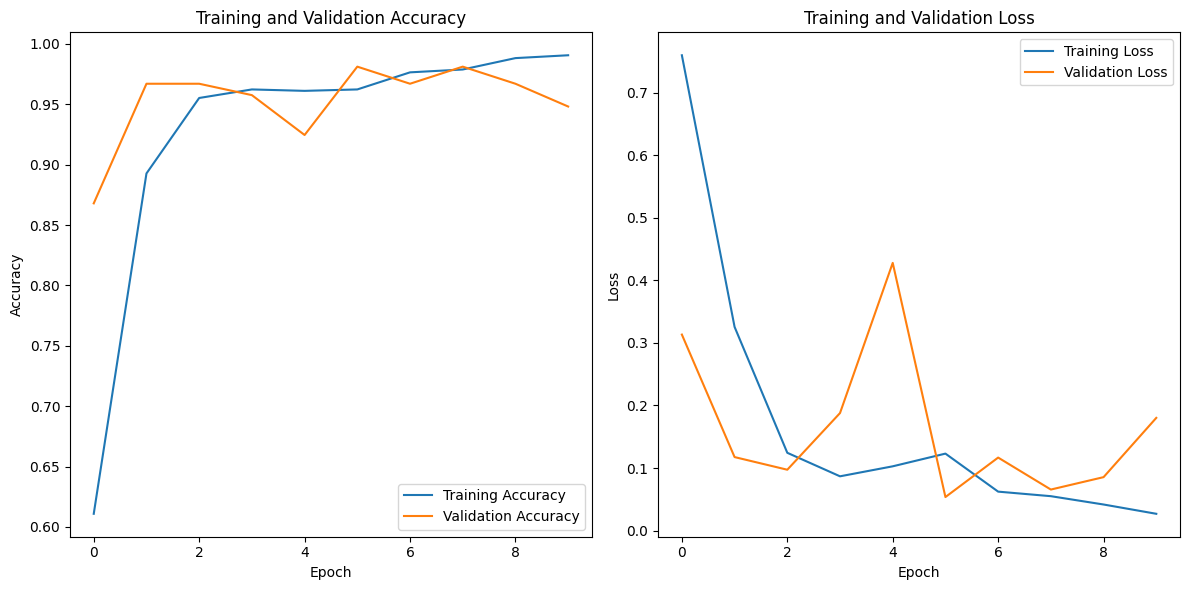

In [11]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()